# DILAN’S TRAVEL GUIDE

## THE FINAL TASK - JUNIOR DATA SCIENTIST’S FIRST MONTH

In [2]:
import numpy as np
import pandas as pd

### importing per funnel data

In [3]:
first_read = pd.read_csv('first_read.csv', delimiter = ';', names = ['date_time', 'event_type', 'country', 'user_id', 'source', 'topic'])

In [4]:
returning_read = pd.read_csv('returning_read.csv', delimiter = ';', names = ['date_time', 'event_type', 'country', 'user_id', 'topic'])

In [5]:
subscription = pd.read_csv('subscribe.csv', delimiter = ';', names = ['date_time', 'event_type', 'user_id'])

In [6]:
purchase = pd.read_csv('buy.csv', delimiter = ';', names = ['date_time', 'event_type', 'user_id', 'price'])

### only the date is necessary for further analysis (time is deleted)

In [7]:
first_read['date_time'] = first_read['date_time'].apply(lambda d: d.split(' ')[0])

In [8]:
returning_read['date_time'] = returning_read['date_time'].apply(lambda d: d.split(' ')[0])

In [9]:
returning_read.head()

,date_time,event_type,country,user_id,topic
0,2018-01-01,read,country_5,2458151287,North America
1,2018-01-01,read,country_4,2458151279,Asia
2,2018-01-01,read,country_4,2458151525,Africa
3,2018-01-01,read,country_5,2458151287,Asia
4,2018-01-01,read,country_5,2458151315,South America


In [10]:
subscription['date_time'] = subscription['date_time'].apply(lambda d: d.split(' ')[0])

In [11]:
subscription.head()

,date_time,event_type,user_id
0,2018-01-01,subscribe,2458151268
1,2018-01-01,subscribe,2458151267
2,2018-01-01,subscribe,2458151309
3,2018-01-01,subscribe,2458151358
4,2018-01-01,subscribe,2458151361


In [12]:
purchase['date_time'] = purchase['date_time'].apply(lambda d: d.split(' ')[0])

In [13]:
purchase.head(10)

,date_time,event_type,user_id,price
0,2018-01-01,buy,2458151555,8
1,2018-01-01,buy,2458151933,8
2,2018-01-01,buy,2458152245,8
3,2018-01-01,buy,2458152315,8
4,2018-01-01,buy,2458152371,8
5,2018-01-01,buy,2458152371,80
6,2018-01-01,buy,2458152315,80
7,2018-01-02,buy,2458153264,8
8,2018-01-02,buy,2458151481,8
9,2018-01-02,buy,2458152579,8


### first reads by country

In [25]:
(first_read
     .groupby('country')
     .count()
     .sort_values(by = ['event_type'], ascending = False)[['event_type']])

,event_type
country,
country_7,51791
country_2,50675
country_5,40349
country_6,31156
country_8,15483
country_4,12751
country_1,5076
country_3,2742


### returning reads by country

In [14]:
returning_read.groupby('country').count().sort_values(by = ['event_type'], ascending = False)[['event_type']]

,event_type
country,
country_5,109383
country_7,80276
country_2,79401
country_4,58507
country_6,32596
country_3,6386
country_8,4150
country_1,1155


### subscriptions per country

In [15]:
(subscription
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('country').count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
country,
country_5,2334
country_2,1558
country_7,1470
country_4,1419
country_6,546
country_3,160
country_8,103
country_1,28


### purchases by country

In [16]:
(purchase
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('country')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
country,
country_5,2497
country_2,1791
country_7,1739
country_4,1402
country_6,686
country_3,146
country_8,112
country_1,34


### first reads by source

In [17]:
first_read.groupby('source').count()[['event_type']]

,event_type
source,
AdWords,63065
Reddit,105216
SEO,41742


### returning reads by source

In [26]:
(returning_read
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('source')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
source,
Reddit,173160
SEO,140161
AdWords,58533


### subscriptions per source

In [19]:
(subscription
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('source')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
source,
Reddit,3443
SEO,3103
AdWords,1072


### purchases by source

In [20]:
(purchase
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('source')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
source,
Reddit,3903
SEO,3233
AdWords,1271


### first reads per topic

In [21]:
first_read.groupby('topic').count().sort_values(by = ['event_type'], ascending = False)[['event_type']]

,event_type
topic,
Asia,76092
Europe,39561
North America,37567
South America,25095
Africa,15913
Australia,15795


### returning reads per topic

In [22]:
returning_read.groupby('topic').count().sort_values(by = ['event_type'], ascending = False)[['event_type']]

,event_type
topic,
Asia,118833
North America,92767
Europe,54136
South America,51706
Africa,27481
Australia,26931


### subscriptions per topic

In [23]:
(subscription
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('topic')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
topic,
Asia,4364
North America,1717
Europe,1033
South America,405
Australia,54
Africa,45


### purchases per topic

In [24]:
(purchase
    .merge(first_read, how = 'left', on = 'user_id')
    .groupby('topic')
    .count()
    .sort_values(by = ['event_type_x'], ascending = False)[['event_type_x']])

,event_type_x
topic,
Asia,4848
North America,1868
Europe,1167
South America,447
Australia,39
Africa,38


### first reads per country, source and topic

In [25]:
first_read.groupby(['country', 'source', 'topic']).count().sort_values(by = ['event_type'], ascending = False)[['event_type']]

,,,event_type
country,source,topic,
country_7,Reddit,Asia,12950
country_2,Reddit,Asia,12857
country_5,Reddit,Asia,10065
country_6,Reddit,Asia,7774
country_7,AdWords,Europe,6206
country_2,AdWords,Europe,5991
country_7,SEO,North America,5050
country_2,SEO,North America,4993
country_5,AdWords,Europe,4815


In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

### daily first reads

In [29]:
daily_first_read = first_read.groupby('date_time').count().event_type

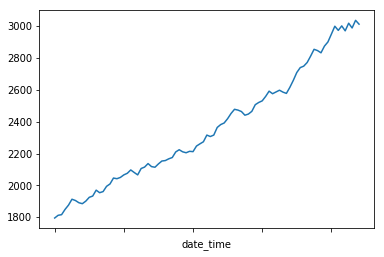

In [30]:
daily_first_read.plot()

### future trend for first-time readers

In [29]:
daily_first_read_clean = daily_first_read.reset_index(drop = True)

In [30]:
x_fr = daily_first_read_clean.index
y_fr = daily_first_read_clean.values

In [31]:
coefs = np.polyfit(x_fr, y_fr, 1)
predict = np.poly1d(coefs)

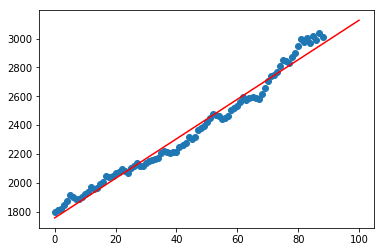

In [32]:
x_fr_test = np.linspace(0, 100)
y_fr_pred = predict(x_fr_test[:, None])
plt.scatter(x_fr, y_fr)
plt.plot(x_fr_test, y_fr_pred, c = 'r')
plt.show()

In [33]:
from sklearn.metrics import r2_score
r2_score(y_fr, predict(x_fr))

0.9778173691382872

In [34]:
predict(90 + 30)

3401.6015662240397

### daily returning reads

In [35]:
daily_returning_read = returning_read.groupby('date_time').count().event_type

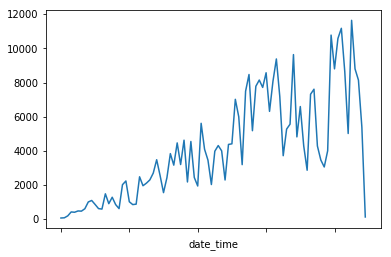

In [36]:
daily_returning_read.plot()

### future trend for returning reads

In [37]:
daily_returning_read_clean = daily_returning_read.reset_index(drop = True)

In [38]:
x_rr = daily_returning_read_clean.index
y_rr = daily_returning_read_clean.values

In [39]:
coefs = np.polyfit(x_rr, y_rr, 1)
predict = np.poly1d(coefs)

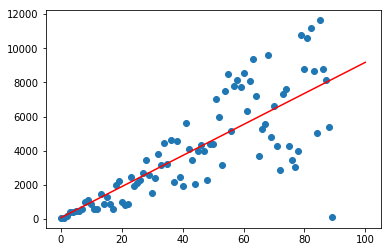

In [40]:
x_rr_test = np.linspace(0, 100)
y_rr_pred = predict(x_rr_test[:, None])
plt.scatter(x_rr, y_rr)
plt.plot(x_rr_test, y_rr_pred, c = 'r')
plt.show()

In [41]:
from sklearn.metrics import r2_score
r2_score(y_rr, predict(x_rr))

0.6047930538567374

In [42]:
predict(90 + 30)

10993.731072423203

### daily subscriptions

In [43]:
daily_subscription = subscription.groupby('date_time').count().event_type

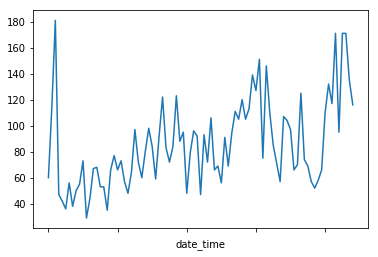

In [44]:
daily_subscription.plot()

### future trend for subscriptions

In [45]:
daily_subscription_clean = daily_subscription.reset_index(drop = True)

In [46]:
x_s = daily_subscription_clean.index
y_s = daily_subscription_clean.values

In [47]:
coefs = np.polyfit(x_s, y_s, 1)
predict = np.poly1d(coefs)

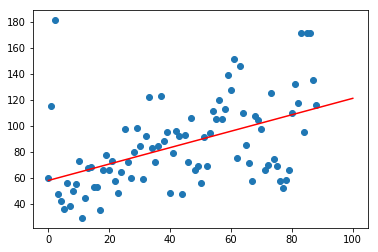

In [48]:
x_s_test = np.linspace(0, 100)
y_s_pred = predict(x_s_test[:, None])
plt.scatter(x_s, y_s)
plt.plot(x_s_test, y_s_pred, c = 'r')
plt.show()

In [49]:
from sklearn.metrics import r2_score
r2_score(y_s, predict(x_s))

0.23478327724565584

In [50]:
predict(90 + 30)

133.58910452843037

### daily purchases

In [51]:
daily_purchase = purchase.groupby('date_time').count().event_type

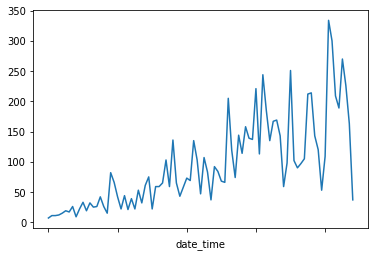

In [52]:
daily_purchase.plot()

### future trend for purchases

In [53]:
daily_purchase_clean = daily_purchase.reset_index(drop = True)

In [54]:
x_p = daily_purchase_clean.index
y_p = daily_purchase_clean.values

In [55]:
coefs = np.polyfit(x_p, y_p, 1)
predict = np.poly1d(coefs)

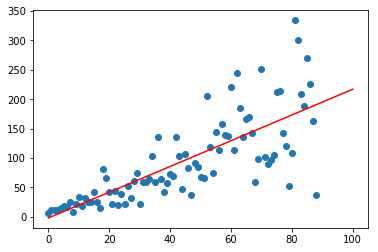

In [56]:
x_p_test = np.linspace(0, 100)
y_p_pred = predict(x_p_test[:, None])
plt.scatter(x_p, y_p)
plt.plot(x_p_test, y_p_pred, c = 'r')
plt.show()

In [57]:
from sklearn.metrics import r2_score
r2_score(y_p, predict(x_p))

0.5823487611483158

In [58]:
first_read.tail()

,date_time,event_type,country,user_id,source,topic
210018,2018-03-30,read,country_1,2458361279,SEO,North America
210019,2018-03-30,read,country_6,2458361280,AdWords,Asia
210020,2018-03-30,read,country_8,2458361281,AdWords,Europe
210021,2018-03-30,read,country_5,2458361282,AdWords,Europe
210022,2018-03-30,read,country_5,2458361283,Reddit,Asia


### cohort analysis

In [114]:
date_list = ['2018-01-01', 
             '2018-01-02', 
             '2018-01-03', 
             '2018-01-04', 
             '2018-01-05', 
             '2018-01-06', 
             '2018-01-07',
             '2018-01-08', 
             '2018-01-09', 
             '2018-01-10', 
             '2018-01-11',
             '2018-01-12', 
             '2018-01-13', 
             '2018-01-14', 
             '2018-01-15', 
             '2018-01-16', 
             '2018-01-17',
             '2018-01-18',
             '2018-01-19', 
             '2018-01-20',
             '2018-01-21',
             '2018-01-22', 
             '2018-01-23',
             '2018-01-24',
             '2018-01-25', 
             '2018-01-26',
             '2018-01-27',
             '2018-01-28']
             

In [115]:
cohort_analysis = pd.DataFrame(index=date_list, columns=range(14))

In [116]:
idx_cohort = 0
for cohort in date_list[:14]:
    cohort_users = first_read[first_read['date_time'] == cohort].user_id.drop_duplicates()
    for d in range(14):
        ret_read = returning_read[returning_read['date_time'] == date_list[idx_cohort + d]].user_id.drop_duplicates()
        current_cell = (pd.Series(list(set(cohort_users).intersection(set(ret_read)))).count())
        cohort_analysis.at[cohort, d] = current_cell
    
    idx_cohort = idx_cohort + 1

In [117]:
cohort_analysis = cohort_analysis.head(14)

In [120]:
cohort_analysis.to_csv('cohort_analysis.csv')

In [121]:
cohort_analysis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2018-01-01,47,37,28,35,26,25,17,23,36,29,25,28,19,25
2018-01-02,41,42,51,42,38,29,34,39,33,29,24,19,27,23
2018-01-03,38,52,43,36,23,28,34,20,16,18,14,17,10,13
2018-01-04,56,56,42,31,34,42,38,41,33,23,29,26,25,22
2018-01-05,54,48,34,34,30,29,27,28,21,28,21,15,14,5
2018-01-06,79,68,50,53,35,26,19,17,24,27,27,23,8,27
2018-01-07,62,67,61,49,40,32,24,26,23,23,20,8,29,23
2018-01-08,95,91,65,55,44,34,34,32,32,25,5,25,20,12
2018-01-09,110,89,48,39,28,36,28,17,14,5,18,15,9,7
2018-01-10,107,103,69,52,53,38,34,29,22,28,26,15,12,8
